### Inteligentni sistemi 

# Nadgledano učenje- Klasifikacija srčanih oboljenja 

Anđela Mladenović, br indeksa 03/24

## Pregled projekta

Cilj ovog projekta je predviđanje prisustva srčanih oboljenja primenom metoda mašinskog učenja, na osnovu kliničkih i demografskih podataka o pacijentima. U okviru istraživanja analizirano je i upoređeno više algoritama, uključujući logističku regresiju, K-najbližih suseda (KNN) i veštačke neuronske mreže, kako bi se utvrdio najefikasniji model za rešavanje ovog problema.


## Skup podataka

Skup podataka korišćen u ovom projektu sadrži informacije o prisustvu ili odsustvu kardiovaskularnih oboljenja kod pacijenata. Podaci su preuzeti sa Kaggle platforme i obuhvataju numeričke i kategorijalne karakteristike povezane sa zdravstvenim indikatorima.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("data/cardio_train.csv", sep=';')

In [3]:
df_raw = df.copy()


In [4]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [57]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [58]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [59]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
df.shape 

(70000, 13)

## Čišćenje skupa podataka

Skup podataka obuhvata kliničke i demografske informacije relevantne za analizu srčanih oboljenja. Cilj je predikcija prisustva srčanih oboljenja na osnovu dostupnih atributa pacijenata.

Ulazne karakteristike uključuju starost, pol, krvni pritisak, aktivnost, konzumiranje nikotina, alkohola, kao i prisustvi holesterola.

Ciljna promenljiva označava prisustvo srčanog oboljenja (0 – nema oboljenja, 1 – oboljenje prisutno).

In [5]:
df.columns


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
df['cardio'] = df['cardio'].astype(int)


In [7]:
df['cardio'].dtype


dtype('int64')

In [8]:
df['cardio'] = pd.to_numeric(df['cardio'], errors='coerce')


In [9]:
df['cardio'].isna().sum()


np.int64(0)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().any()


id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [12]:
df = df[
    (df['ap_hi'].between(80, 220)) &
    (df['ap_lo'].between(50, 150))
].copy()


In [13]:
df = df[df['ap_hi'] >= df['ap_lo']].copy()


In [14]:
df['age_years'] = (df['age'] / 365).round(1)
df = df.drop(columns=['age'])


In [15]:
df = df.drop(columns=['id'], errors='ignore')

In [16]:
df = df[
    (df['height'] > 120) &
    (df['height'] < 220) &
    (df['weight'] > 35) &
    (df['weight'] < 180)
].copy()


In [17]:
df[(df['ap_hi'] < df['ap_lo'])].shape


(0, 12)

In [18]:
target_summary = (
    df['cardio']
    .value_counts()
    .sort_index()
    .to_frame(name="Count")
)

target_summary["Percentage (%)"] = (
    target_summary["Count"] / target_summary["Count"].sum() * 100
).round(2)

target_summary.index = target_summary.index.map({
    0: "No Heart Disease",
    1: "Heart Disease"
})

target_summary


,Count,Percentage (%)
cardio,,
No Heart Disease,34631,50.53
Heart Disease,33899,49.47


In [19]:
df = df.reset_index(drop=True)


In [20]:
df.describe()


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,68530.000000,68530.000000,68530.000000,68530.000000,68530.000000,68530.000000,68530.000000,68530.000000,68530.000000,68530.00000,68530.000000,68530.000000
mean,1.348606,164.436553,74.111033,126.663345,81.312009,1.364643,1.225741,0.088005,0.053349,0.80340,0.494659,53.329116
std,0.476533,7.849141,14.242284,16.631243,9.388596,0.678895,0.571620,0.283305,0.224730,0.39743,0.499975,6.761275
min,1.000000,122.000000,35.450000,80.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,29.600000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,48.400000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,54.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.00000,1.000000,58.400000
max,2.000000,207.000000,178.000000,220.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.00000,1.000000,65.000000


In [21]:
comparison_shape = pd.DataFrame({
    'Before cleaning': df_raw.shape,
    'After cleaning': df.shape
}, index=['Rows', 'Columns'])

comparison_shape


,Before cleaning,After cleaning
Rows,70000,68530
Columns,13,12


In [22]:
missing_comparison = pd.DataFrame({
    'Before cleaning': df_raw.isnull().sum(),
    'After cleaning': df.isnull().sum()
})

missing_comparison


,Before cleaning,After cleaning
active,0.0,0.0
age,0.0,NaN
age_years,NaN,0.0
alco,0.0,0.0
ap_hi,0.0,0.0
ap_lo,0.0,0.0
cardio,0.0,0.0
cholesterol,0.0,0.0
gender,0.0,0.0
gluc,0.0,0.0


In [79]:
stats_before = df_raw.describe().T
stats_after = df.describe().T

comparison_stats = stats_before[['mean', 'std', 'min', 'max']].join(
    stats_after[['mean', 'std', 'min', 'max']],
    lsuffix='_before',
    rsuffix='_after'
)

comparison_stats


,mean_before,std_before,min_before,max_before,mean_after,std_after,min_after,max_after
id,49972.419900,28851.302323,0.0,99999.0,NaN,NaN,NaN,NaN
age,19468.865814,2467.251667,10798.0,23713.0,NaN,NaN,NaN,NaN
gender,1.349571,0.476838,1.0,2.0,1.348606,0.476533,1.00,2.0
height,164.359229,8.210126,55.0,250.0,164.436553,7.849141,122.00,207.0
weight,74.205690,14.395757,10.0,200.0,74.111033,14.242284,35.45,178.0
ap_hi,128.817286,154.011419,-150.0,16020.0,126.663345,16.631243,80.00,220.0
ap_lo,96.630414,188.472530,-70.0,11000.0,81.312009,9.388596,50.00,150.0
cholesterol,1.366871,0.680250,1.0,3.0,1.364643,0.678895,1.00,3.0
gluc,1.226457,0.572270,1.0,3.0,1.225741,0.571620,1.00,3.0
smoke,0.088129,0.283484,0.0,1.0,0.088005,0.283305,0.00,1.0


### Analiza ciljne promenljive


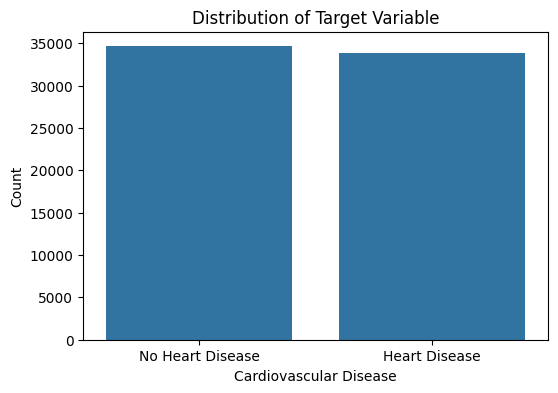

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='cardio', data=df)
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'])
plt.title("Distribution of Target Variable")
plt.ylabel("Count")
plt.xlabel("Cardiovascular Disease")
plt.show()


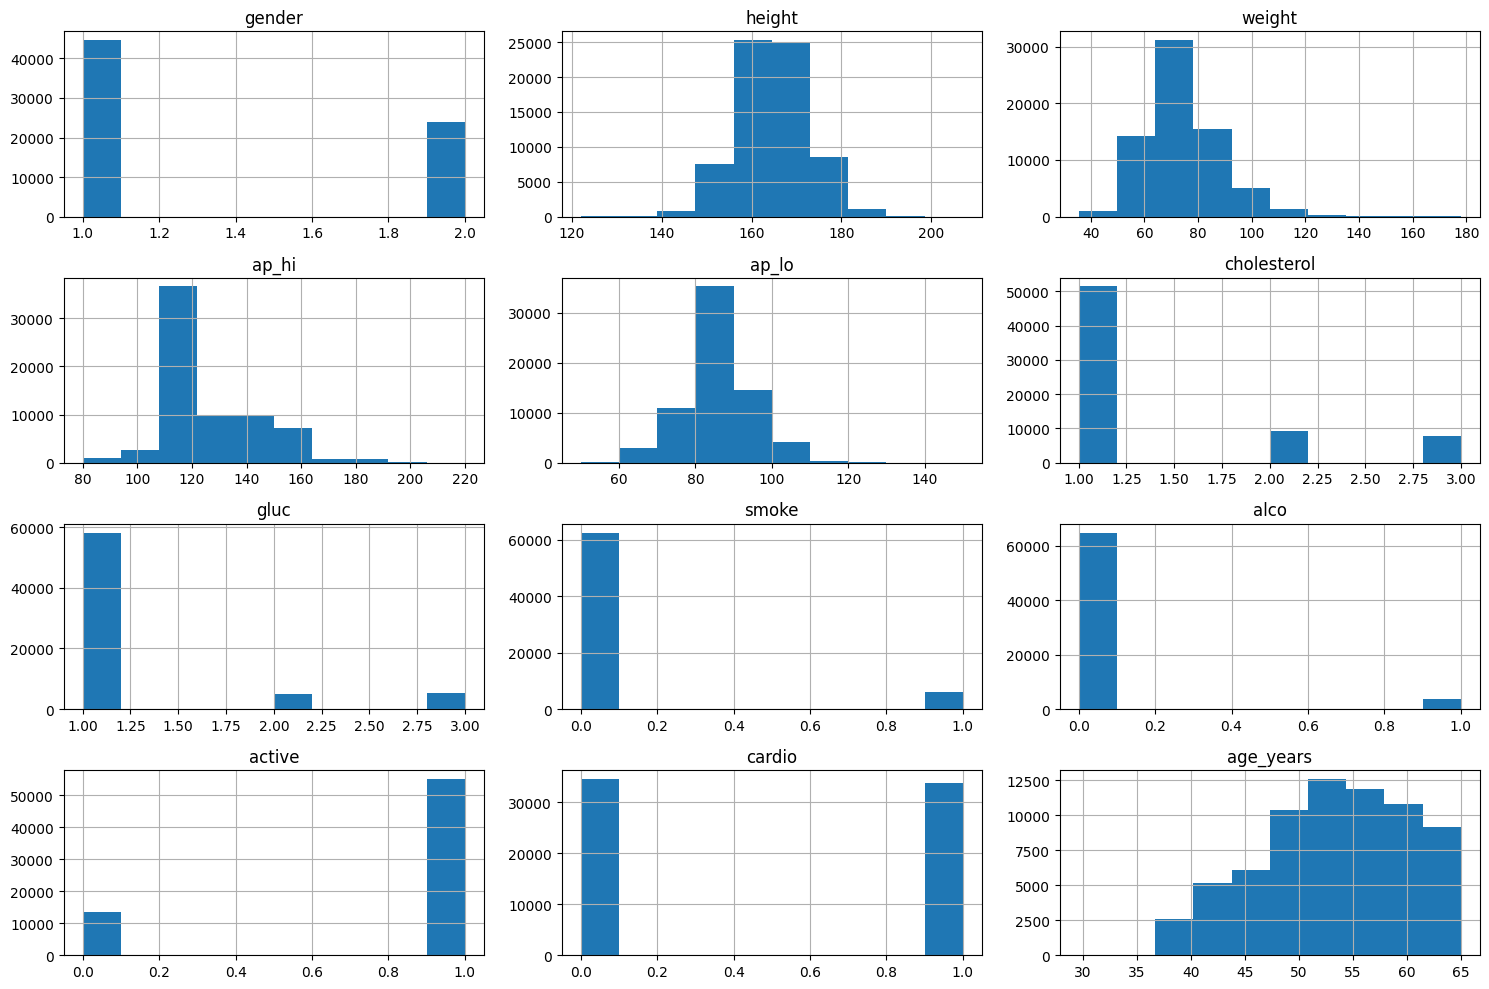

In [81]:
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


In [25]:

bins = [0, 29, 39, 49, 59, 69, 150]
labels = ['<30', '30–39', '40–49', '50–59', '60–69', '70+']

df['age_group'] = pd.cut(
    df['age_years'],
    bins=bins,
    labels=labels,
    include_lowest=True
)




In [26]:
age_group_summary = pd.crosstab(
    df['age_group'],
    df['cardio'],
    normalize='index'
) * 100

age_group_summary = age_group_summary.rename(
    columns={0: 'No Heart Disease (%)', 1: 'Heart Disease (%)'}
).round(2)

age_group_summary


cardio,No Heart Disease (%),Heart Disease (%)
age_group,,
30–39,100.00,0.00
40–49,64.73,35.27
50–59,50.83,49.17
60–69,34.49,65.51


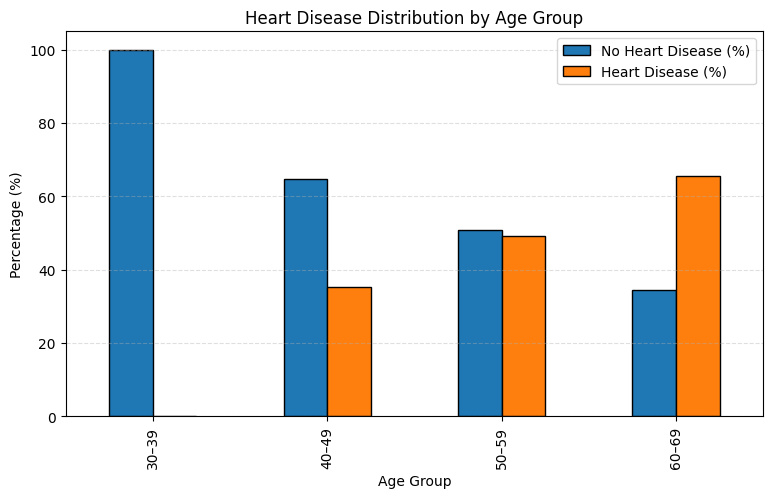

In [27]:
age_group_summary.plot(
    kind='bar',
    figsize=(9, 5),
    edgecolor='black'
)

plt.ylabel("Percentage (%)")
plt.xlabel("Age Group")
plt.title("Heart Disease Distribution by Age Group")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


In [28]:
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)


In [29]:
df['bmi_group'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)


In [91]:
bmi_cardio_summary = (
    df.groupby('bmi_group', observed=True)['cardio']
    .value_counts(normalize=True)
    .unstack()
    .round(3) * 100
)

bmi_cardio_summary


cardio,0,1
bmi_group,,
Underweight,73.0,27.0
Normal,60.2,39.8
Overweight,49.5,50.5
Obese,37.5,62.5


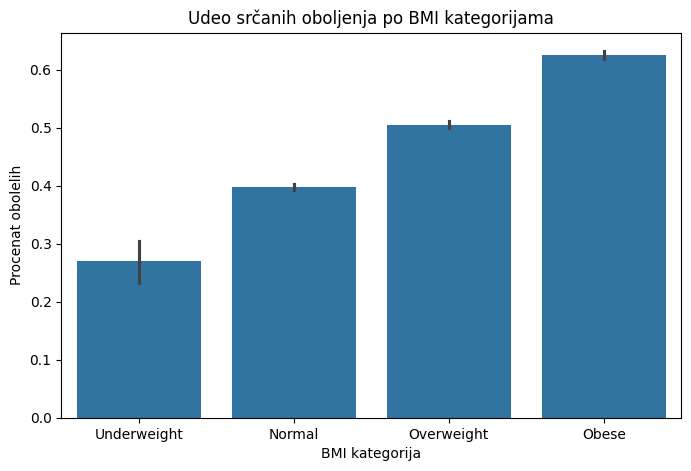

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='bmi_group',
    y='cardio',
    data=df,
    estimator=lambda x: sum(x)/len(x)
)
plt.ylabel("Procenat obolelih")
plt.xlabel("BMI kategorija")
plt.title("Udeo srčanih oboljenja po BMI kategorijama")
plt.show()


In [32]:
df['gender_label'] = df['gender'].map({1: 'Female', 2: 'Male'})



In [33]:
gender_cardio_summary = (
    df.groupby('gender_label')['cardio']
    .value_counts(normalize=True)
    .unstack()
    .round(3) * 100
)

gender_cardio_summary



cardio,0,1
gender_label,,
Female,50.8,49.2
Male,50.1,49.9


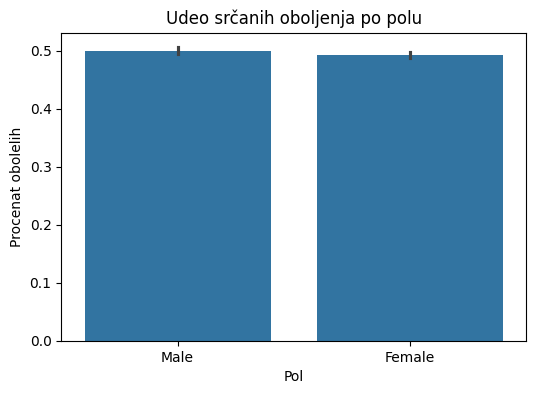

In [91]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='gender_label',
    y='cardio',
    data=df,
    estimator=lambda x: sum(x)/len(x)
)
plt.ylabel("Procenat obolelih")
plt.xlabel("Pol")
plt.title("Udeo srčanih oboljenja po polu")
plt.show()


In [34]:
smoke_summary = (
    df.groupby('smoke')['cardio']
    .value_counts(normalize=True)
    .unstack()
    .round(3) * 100
)

smoke_summary


cardio,0,1
smoke,,
0,50.3,49.7
1,53.1,46.9


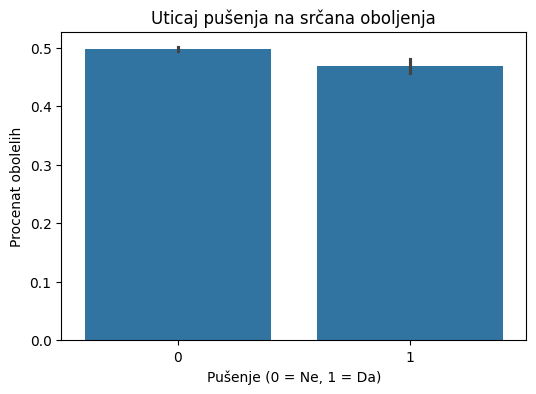

In [93]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='smoke',
    y='cardio',
    data=df,
    estimator=lambda x: sum(x)/len(x)
)
plt.xlabel("Pušenje (0 = Ne, 1 = Da)")
plt.ylabel("Procenat obolelih")
plt.title("Uticaj pušenja na srčana oboljenja")
plt.show()


In [35]:
alco_summary = (
    df.groupby('alco')['cardio']
    .value_counts(normalize=True)
    .unstack()
    .round(3) * 100
)

alco_summary


cardio,0,1
alco,,
0,50.4,49.6
1,52.3,47.7


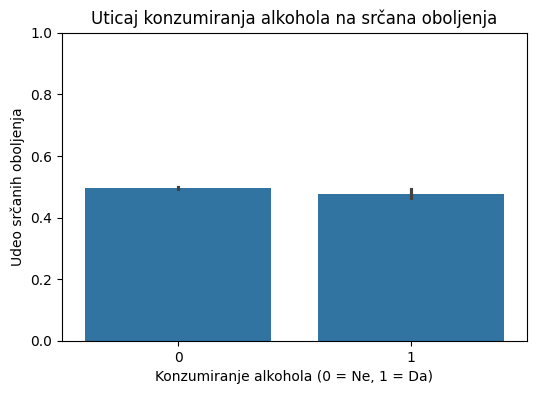

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(
    x='alco',
    y='cardio',
    data=df,
    estimator=lambda x: x.mean()
)

plt.xlabel("Konzumiranje alkohola (0 = Ne, 1 = Da)")
plt.ylabel("Udeo srčanih oboljenja")
plt.title("Uticaj konzumiranja alkohola na srčana oboljenja")
plt.ylim(0, 1)
plt.show()


In [36]:
active_summary = (
    df.groupby('active')['cardio']
    .value_counts(normalize=True)
    .unstack()
    .round(3) * 100
)

active_summary


cardio,0,1
active,,
0,46.7,53.3
1,51.5,48.5


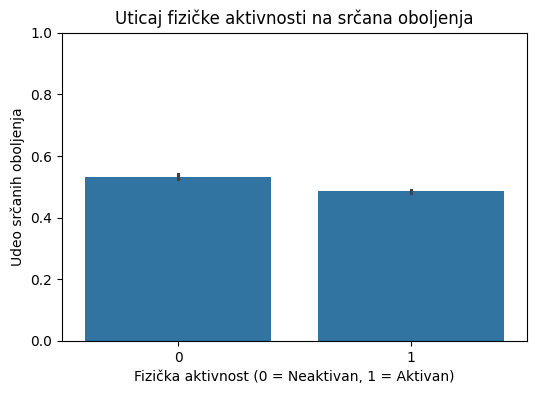

In [97]:

plt.figure(figsize=(6,4))
sns.barplot(
    x='active',
    y='cardio',
    data=df,
    estimator=lambda x: x.mean()
)

plt.xlabel("Fizička aktivnost (0 = Neaktivan, 1 = Aktivan)")
plt.ylabel("Udeo srčanih oboljenja")
plt.title("Uticaj fizičke aktivnosti na srčana oboljenja")
plt.ylim(0, 1)
plt.show()


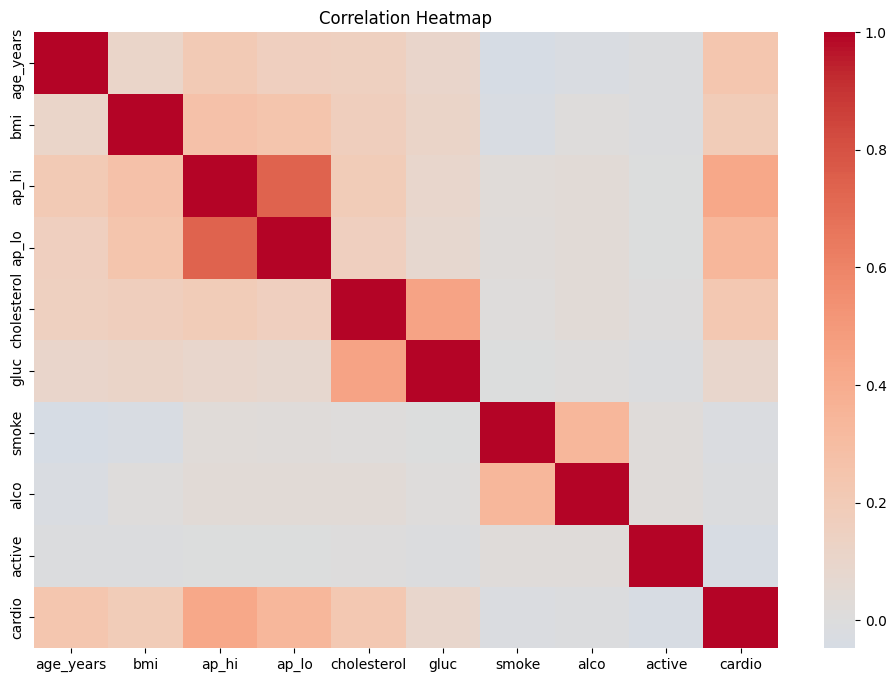

In [98]:
plt.figure(figsize=(12,8))
corr = df[['age_years', 'bmi', 'ap_hi', 'ap_lo', 
           'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']].corr()

sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()



Na osnovu grafičke analize može se utvrditi da skup podataka ima dobru osnovu za primenu nadgledanog učenja.

### Pripremanje za model mašinskog učenja

U ovom delu skup podataka se priprema za model mašinskog učenja razdvajanjem karakteristika i ciljne promenljive, kodiranjem kategoričkih atributa, skaliranjem numeričkih karakteristika i deljenjem podataka u skupove u obuku i testiranje.

In [37]:
X = df.drop(columns=['cardio', 'age_group', 'bmi_group', 'gender_label'])
y = df['cardio']



In [38]:
categorical_cols = [
    'cholesterol',
    'gluc',
    'smoke',
    'alco',
    'active'
]


In [39]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.dtypes.value_counts()



bool       7
int64      4
float64    3
Name: count, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


Skup podatka podeljen je na skupove za obuku i skupove za testiranje koristeći odnos 80/20, uz očuvanje raspodele klasa kroz sertifikaciju.

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((54824, 14), (13706, 14), (54824,), (13706,))

## Logistička regresija

Logistička regresija koristi se kao osnovni model za binarnu klasifikaciju. Ona pruža jednostavan i interpretabilan pristup i služi kao referentna tačka za poređenje složenijih modela kao što su neuronkse mreže.

### Osnovni (Baseline) model

Kao referentna tačka za procenu performansi složenijih modela korišćen je osnovni model logističke regresije. Njegovi rezultati služe za poređenje i omogućavaju jasniju procenu doprinosa i efikasnosti naprednijih algoritama.

In [62]:
from sklearn.linear_model import LogisticRegression



log_reg = LogisticRegression(
 max_iter=5000,
  solver='lbfgs',
    class_weight='balanced',
    random_state=42
)
X_train_scaled.dtypes

log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [63]:

y_pred_lr = log_reg.predict(X_test_scaled)



In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr


0.7247191011235955

In [65]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6926
           1       0.75      0.67      0.71      6780

    accuracy                           0.72     13706
   macro avg       0.73      0.72      0.72     13706
weighted avg       0.73      0.72      0.72     13706



Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

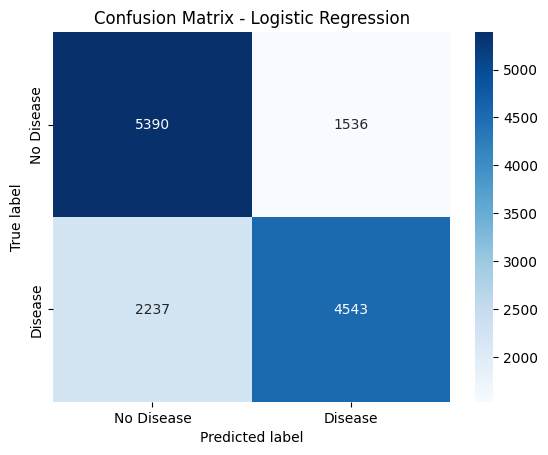

In [109]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Disease', 'Disease'],
    yticklabels=['No Disease', 'Disease']
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Logistic Regression")



### Logistička regresija-efekat regulacije

Procenjivanje uticaja parametra (C) na performanse modela.

In [66]:
C_values = [0.01, 0.1, 1, 10, 100]
f1_scores = []

for C in C_values:
    log_reg = LogisticRegression(
        C=C,
        penalty='l2',
         solver='saga',
        class_weight='balanced',
        max_iter=5000,
        random_state=42
    )
    log_reg.fit(X_train_scaled, y_train)
    y_pred = log_reg.predict(X_test_scaled)
    f1_scores.append(f1_score(y_test, y_pred))
    
best_C = C_values[np.argmax(f1_scores)]
print("Best C:", best_C)



Best C: 0.01


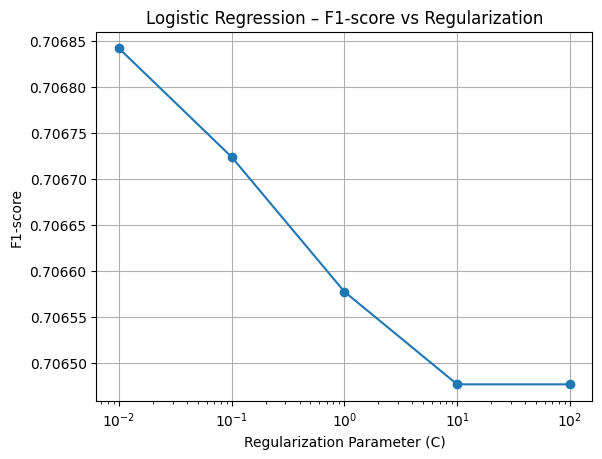

In [154]:
plt.figure()
plt.plot(C_values, f1_scores, marker='o')
plt.xscale("log")
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("F1-score")
plt.title("Logistic Regression – F1-score vs Regularization")
plt.grid(True)
plt.show()



In [155]:
train_acc = []
test_acc = []

for C in C_values:
    model = LogisticRegression(
        C=C,
    penalty='l2',
    solver='saga',
    class_weight='balanced',
    max_iter=5000,
    tol=1e-3,
    random_state=42
)
    
    model.fit(X_train_scaled, y_train)

   
    train_acc.append(model.score(X_train_scaled, y_train))
    test_acc.append(model.score(X_test_scaled, y_test))


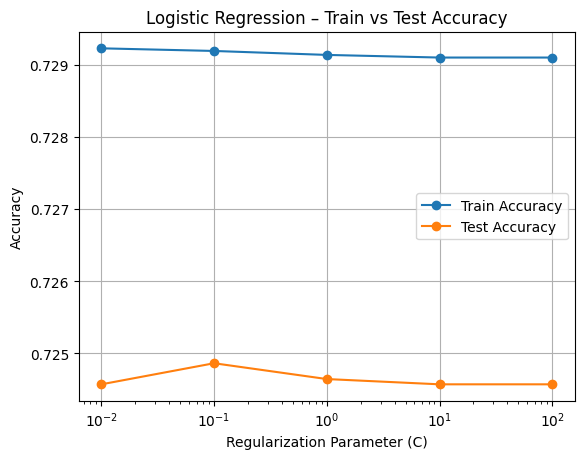

In [156]:
plt.figure()
plt.plot(C_values, train_acc, marker='o', label="Train Accuracy")
plt.plot(C_values, test_acc, marker='o', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Accuracy")
plt.title("Logistic Regression – Train vs Test Accuracy")
plt.legend()
plt.grid(True)
plt.show() 

In [67]:
final_log_reg = LogisticRegression(
    C=best_C,
    penalty='l2',
    solver='saga',
    class_weight='balanced',
    max_iter=5000,
    random_state=42
)

final_log_reg.fit(X_train_scaled, y_train)
y_pred_lr = final_log_reg.predict(X_test_scaled)



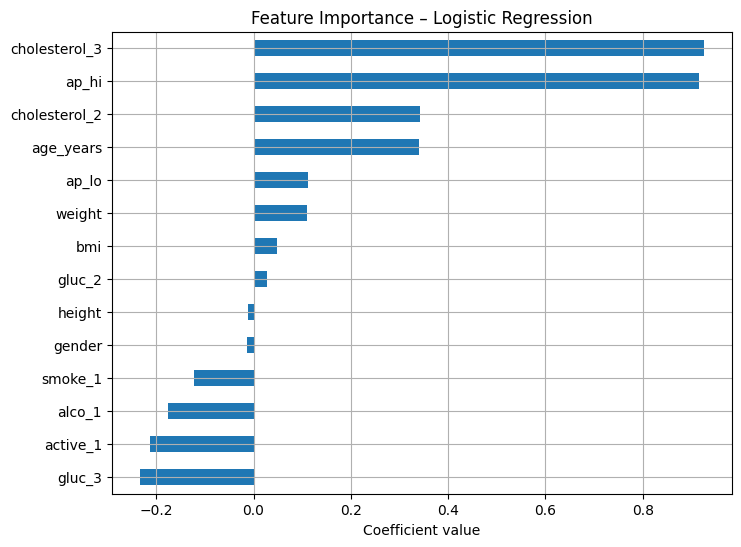

In [152]:
coefficients = pd.Series(
    final_log_reg.coef_[0],
    index=X_train_scaled.columns
).sort_values()

plt.figure(figsize=(8, 6))
coefficients.plot(kind='barh')
plt.title("Feature Importance – Logistic Regression")
plt.xlabel("Coefficient value")
plt.grid(True)
plt.show()



## K-Nearest Neighbors (KNN)
KNN je neparametarski algoritam klasifikacije koji dodeljuje klasu tački klasi podataka na osnovu većinske klase među njenim najbližim susedima. Model se oslanja na proračune udaljenosti, što skaliranje karakteristika čini ključnim korakom.

### KNN – Baseline Model (k = 5)

Model procenjuje performanse klasifikatora K-najbližih suseda, koristeći k=5


In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.69      0.71      0.70      6926
           1       0.69      0.67      0.68      6780

    accuracy                           0.69     13706
   macro avg       0.69      0.69      0.69     13706
weighted avg       0.69      0.69      0.69     13706



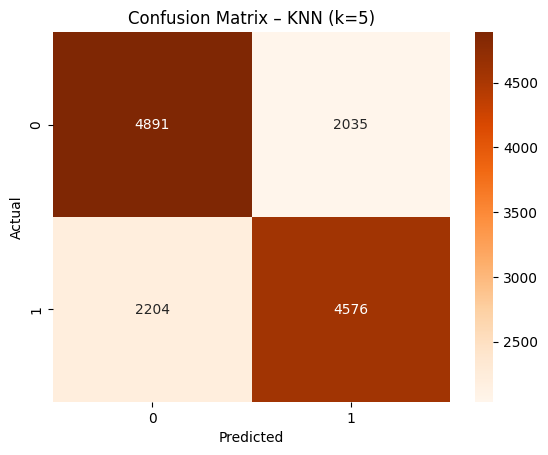

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix – KNN (k=5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


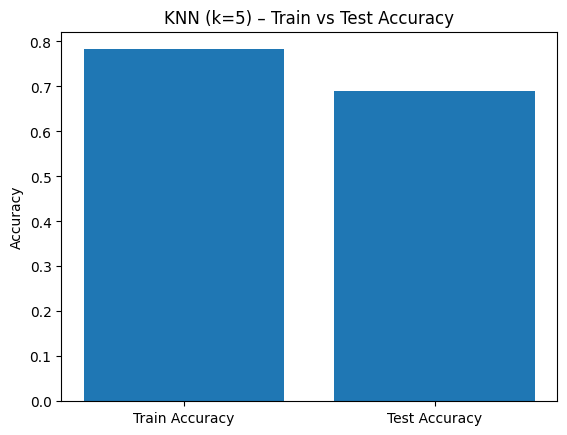

In [118]:
train_acc = knn.score(X_train_scaled, y_train)
test_acc = knn.score(X_test_scaled, y_test)

plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc])
plt.ylabel("Accuracy")
plt.title("KNN (k=5) – Train vs Test Accuracy")
plt.show()


### KNN – Varying k


In [69]:

from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 21)
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    f1_scores.append(f1_score(y_test, y_pred))


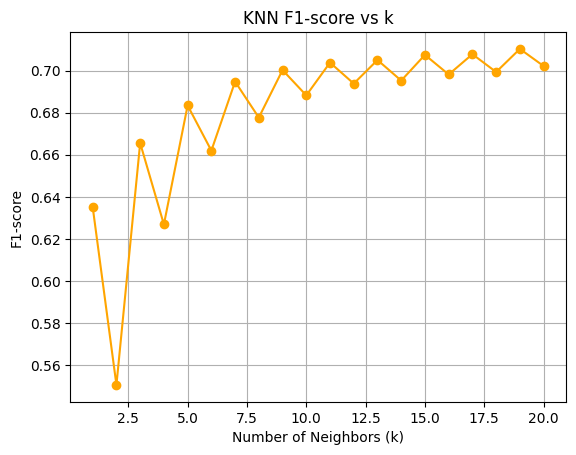

In [120]:
plt.plot(k_values, f1_scores, marker='o', color='orange')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("F1-score")
plt.title("KNN F1-score vs k")
plt.grid(True)
plt.show()


In [70]:
knn_final = KNeighborsClassifier(n_neighbors=9) 
knn_final.fit(X_train_scaled, y_train) 
y_pred_knn = knn_final.predict(X_test_scaled)

In [71]:
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.70      0.73      0.72      6926
           1       0.72      0.69      0.70      6780

    accuracy                           0.71     13706
   macro avg       0.71      0.71      0.71     13706
weighted avg       0.71      0.71      0.71     13706



## Overfitting / Underfitting analiza

In [123]:
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_accuracies.append(knn.score(X_train_scaled, y_train))
    test_accuracies.append(knn.score(X_test_scaled, y_test))



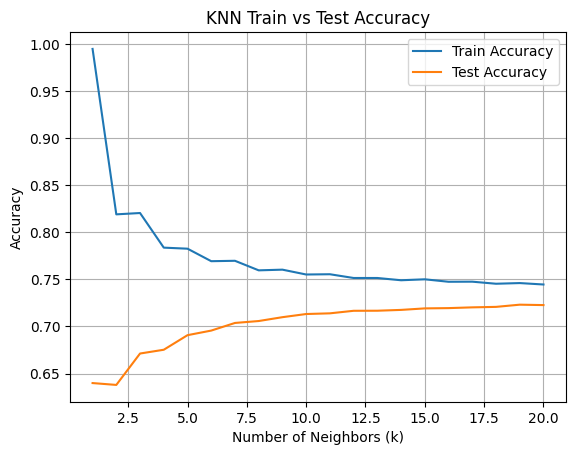

In [124]:
plt.plot(k_values, train_accuracies, label="Train Accuracy")
plt.plot(k_values, test_accuracies, label="Test Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Train vs Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()


## Veštačka neuronska mreža
Veštačka neuronska mreža koristi se kao glavni model zbog svoje sposobnosti da obuhvati složene, nelinearne odnose između karakteristika. Mreža sastoji se od više povezanih slojeva i trenira se korišćenjem metode povratnog širenja. 

Zašto veštačke neuronske mreže?

Veštačke neuronske mreže imaju sposobnost modelovanja složenih nelinearnih odnosa između ulaznih karakteristika. Zbog toga su posebno pogodne za medicinske zadatke predviđanja, gde istovremeno deluje više međusobno povezanih faktora.

### ANN 1 – Baseline Model (Adam Optimizer)

Ovaj model služi kao osnovna konfiguracija veštačke neuronske mreže.
Koristi Adam Optimizer i umerenu mrežnu arhitekturu.

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

ann_adam = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.001,
    early_stopping=True,
    n_iter_no_change=10,
    max_iter=5000,
    random_state=42
)

ann_adam.fit(X_train_scaled, y_train)

y_pred_adam = ann_adam.predict(X_test_scaled)

print("ANN – Adam Optimizer")
print(classification_report(y_test, y_pred_adam))


ANN – Adam Optimizer
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6926
           1       0.76      0.68      0.71      6780

    accuracy                           0.73     13706
   macro avg       0.74      0.73      0.73     13706
weighted avg       0.74      0.73      0.73     13706



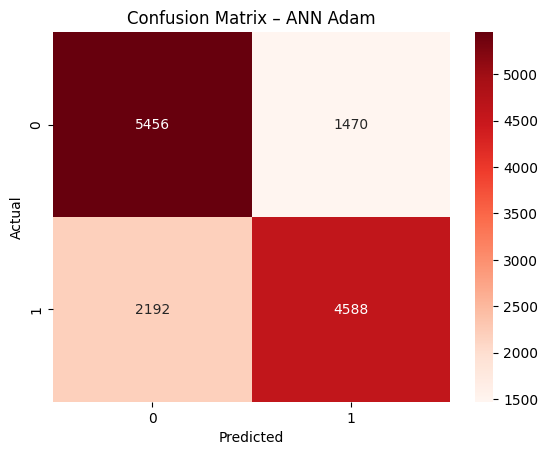

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_adam = confusion_matrix(y_test, y_pred_adam)

sns.heatmap(cm_adam, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – ANN Adam")
plt.show()



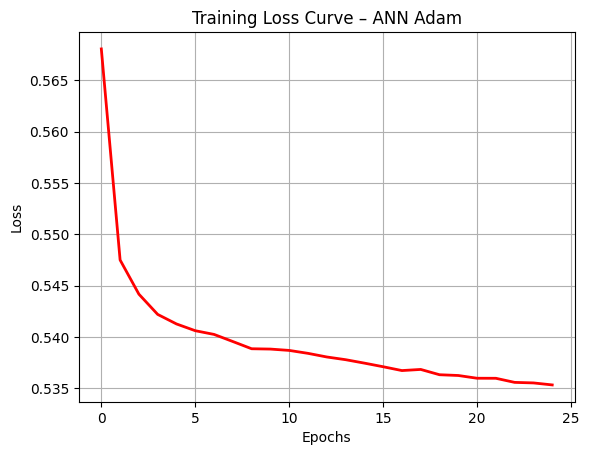

In [127]:
plt.plot(ann_adam.loss_curve_, color='red', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve – ANN Adam")
plt.grid(True)
plt.show()


### ANN 2 – Adagrad (sgd)


In [48]:
ann_sgd = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    solver='sgd',
    learning_rate='adaptive',
    learning_rate_init=0.01,
    max_iter=5000,
    early_stopping=True,
    random_state=42
)

ann_sgd.fit(X_train_scaled, y_train)

y_pred_sgd = ann_sgd.predict(X_test_scaled)

print("ANN – SGD (Adaptive LR)")
print(classification_report(y_test, y_pred_sgd))


ANN – SGD (Adaptive LR)
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6926
           1       0.74      0.70      0.72      6780

    accuracy                           0.73     13706
   macro avg       0.73      0.73      0.73     13706
weighted avg       0.73      0.73      0.73     13706



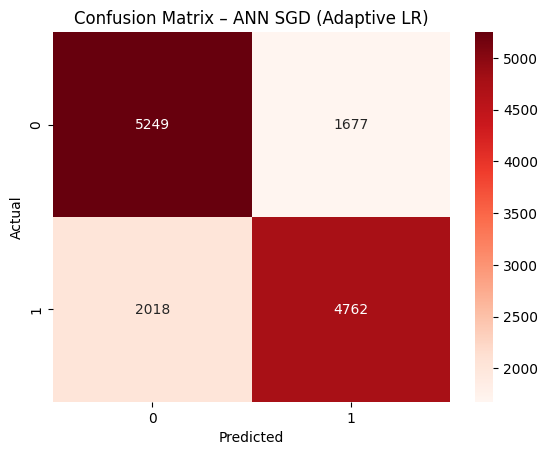

In [129]:
cm_sgd = confusion_matrix(y_test, y_pred_sgd)

sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – ANN SGD (Adaptive LR)")
plt.show()


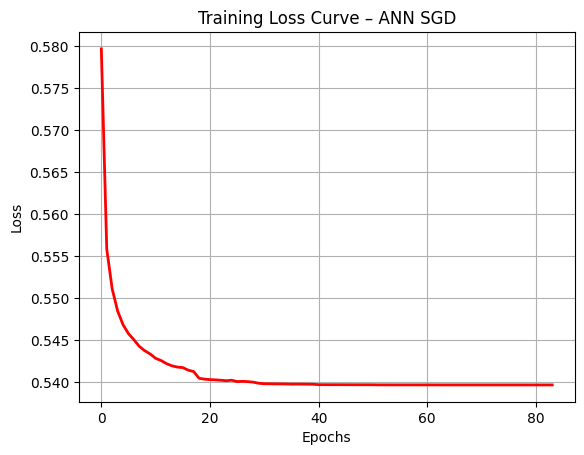

In [130]:
plt.plot(ann_sgd.loss_curve_, color='red', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve – ANN SGD")
plt.grid(True)
plt.show()


### ANN 4 – Overfitted ANN (Demonstration)

Povećavanje kompleksnosti mreže radi pokazivanja overfitted


In [43]:
ann_overfit = MLPClassifier(
    hidden_layer_sizes=(128, 128, 64, 64),
    activation='relu',
    solver='adam',
    alpha=0.0000001,      
    max_iter=8000,       
    early_stopping=False,
    random_state=42
)

ann_overfit.fit(X_train_scaled, y_train)

print("Train score:", ann_overfit.score(X_train_scaled, y_train))

y_pred_overfit = ann_overfit.predict(X_test_scaled)

print("ANN – Overfitted Model")
print(classification_report(y_test, y_pred_overfit))


Train score: 0.8594593608638552
ANN – Overfitted Model
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      6926
           1       0.70      0.62      0.66      6780

    accuracy                           0.68     13706
   macro avg       0.68      0.68      0.68     13706
weighted avg       0.68      0.68      0.68     13706



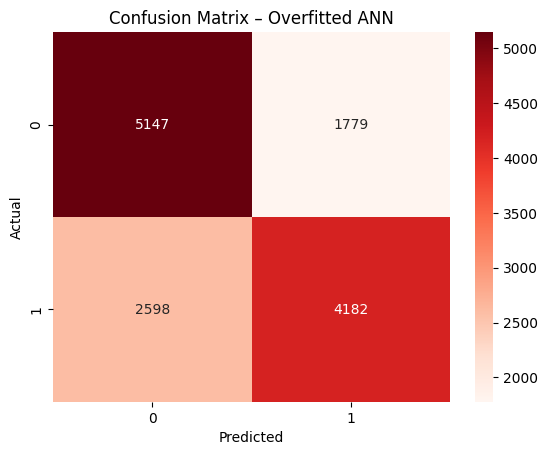

In [44]:
cm_overfit = confusion_matrix(y_test, y_pred_overfit)

sns.heatmap(cm_overfit, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Overfitted ANN")
plt.show()


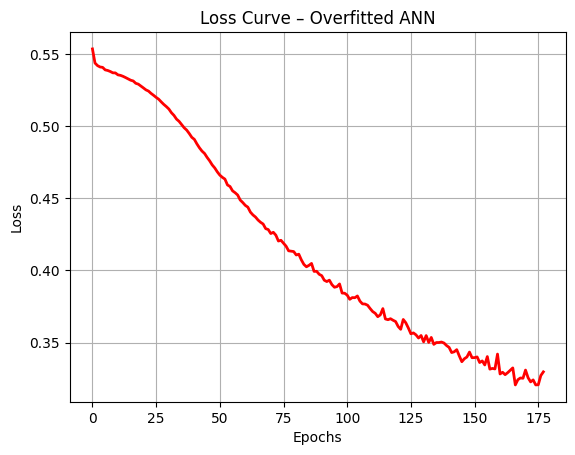

In [45]:
plt.plot(ann_overfit.loss_curve_, color='red', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve – Overfitted ANN")
plt.grid(True)
plt.show()

### ANN 5 – SMOTE + ANN

Primena SMOTE oversampling-a i evaluacija uticaja na ANN

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(
    X_train_scaled,
    y_train
)


In [50]:
ann_smote = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    solver='adam',
    max_iter=5000,
    early_stopping=True,
    random_state=42
)

ann_smote.fit(X_train_sm, y_train_sm)

y_pred_smote = ann_smote.predict(X_test_scaled)

print("ANN – SMOTE")
print(classification_report(y_test, y_pred_smote))



ANN – SMOTE
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6926
           1       0.74      0.70      0.72      6780

    accuracy                           0.73     13706
   macro avg       0.73      0.73      0.73     13706
weighted avg       0.73      0.73      0.73     13706



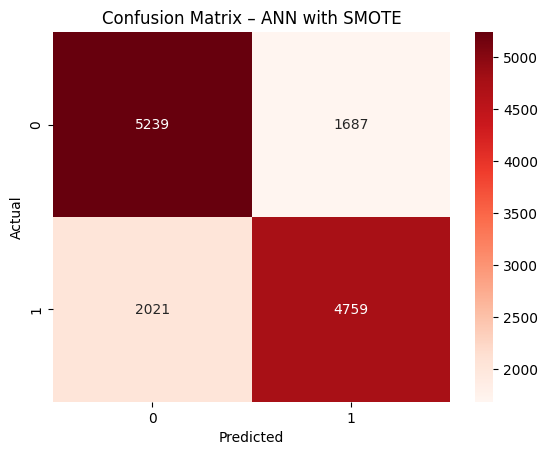

In [136]:
cm_smote = confusion_matrix(y_test, y_pred_smote)

sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – ANN with SMOTE")
plt.show()



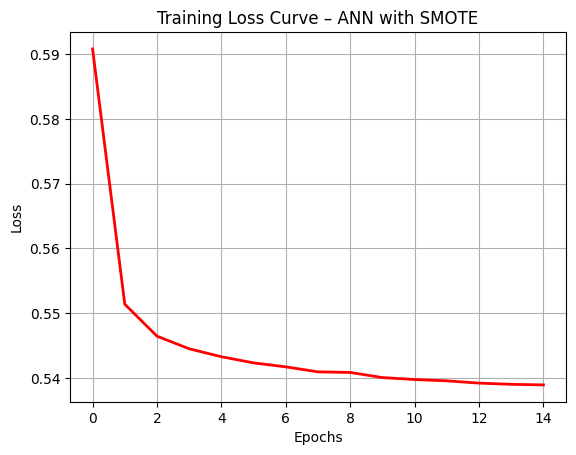

In [137]:
plt.plot(ann_smote.loss_curve_, color='red', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve – ANN with SMOTE")
plt.grid(True)
plt.show()




### Završni poredni grafik ANN

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

models = ["ANN Adam", "ANN Adagrad", "ANN Overfit", "ANN SMOTE"]

accuracy  = [
    accuracy_score(y_test, y_pred_adam),
    accuracy_score(y_test, y_pred_sgd),
    accuracy_score(y_test, y_pred_overfit),
    accuracy_score(y_test, y_pred_smote)
]

precision = [
    precision_score(y_test, y_pred_adam),
    precision_score(y_test, y_pred_sgd),
    precision_score(y_test, y_pred_overfit),
    precision_score(y_test, y_pred_smote)
]

recall = [
    recall_score(y_test, y_pred_adam),
    recall_score(y_test, y_pred_sgd),
    recall_score(y_test, y_pred_overfit),
    recall_score(y_test, y_pred_smote)
]

f1 = [
    f1_score(y_test, y_pred_adam),
    f1_score(y_test, y_pred_sgd),
    f1_score(y_test, y_pred_overfit),
    f1_score(y_test, y_pred_smote)
]

In [53]:
import pandas as pd

results = pd.DataFrame({
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1
}, index=models)

results


,Accuracy,Precision,Recall,F1-score
ANN Adam,0.732818,0.757346,0.676696,0.714753
ANN Adagrad,0.730410,0.739556,0.702360,0.720478
ANN Overfit,0.680651,0.701560,0.616814,0.656463
ANN SMOTE,0.729462,0.738287,0.701917,0.719643


In [54]:
results["Mean Score"] = results.mean(axis=1)
results.sort_values("Mean Score", ascending=False)


,Accuracy,Precision,Recall,F1-score,Mean Score
ANN Adagrad,0.730410,0.739556,0.702360,0.720478,0.723201
ANN SMOTE,0.729462,0.738287,0.701917,0.719643,0.722327
ANN Adam,0.732818,0.757346,0.676696,0.714753,0.720403
ANN Overfit,0.680651,0.701560,0.616814,0.656463,0.663872


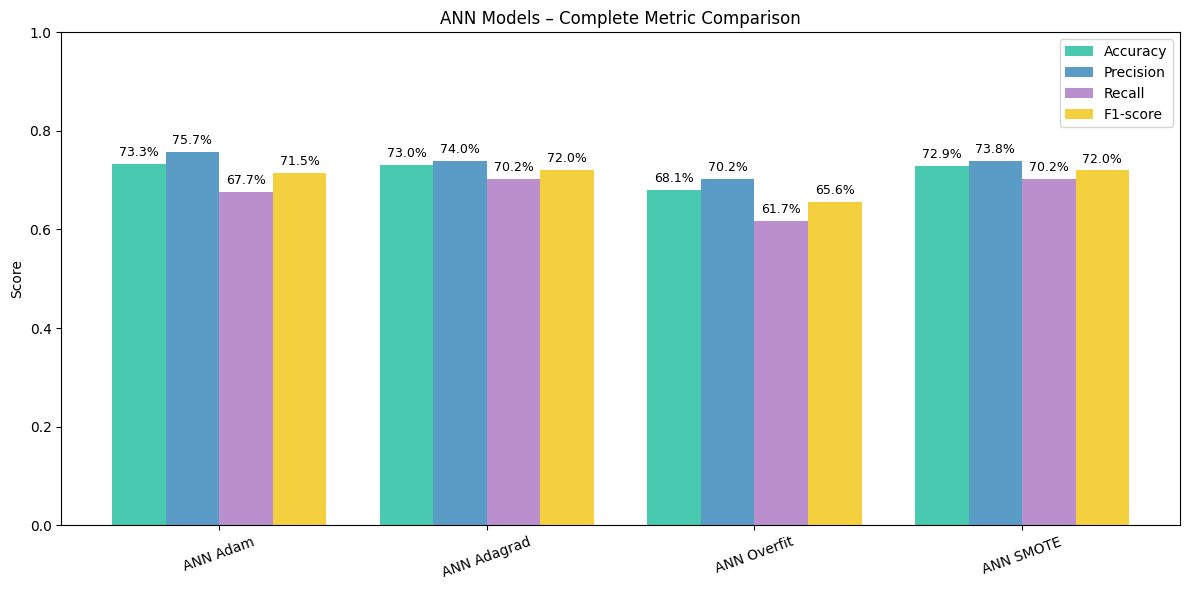

In [55]:

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12,6))

bars1 = plt.bar(x - 1.5*width, accuracy,  width, label='Accuracy', color="#48C9B0")
bars2 = plt.bar(x - 0.5*width, precision, width, label='Precision', color="#5B9CC7" )
bars3 = plt.bar(x + 0.5*width, recall,    width, label='Recall', color="#BB8FCE")
bars4 = plt.bar(x + 1.5*width, f1,         width, label='F1-score',  color="#F4D03F")

plt.ylabel("Score")
plt.title("ANN Models – Complete Metric Comparison")
plt.xticks(x, models, rotation=20)
plt.ylim(0,1)
plt.legend()

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, h + 0.01, f"{h*100:.1f}%", 
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## Poređenje modela

Performanse svih treniranih modela upoređene su korišćenjem klasifikacionih metrika i matrica konfuzije. Ova analiza omogućava uvid u kompromise između interpretabilnosti, složenosti modela i njihove prediktivne moći.

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {
    "ANN (Sgd)": evaluate_model(y_test, y_pred_sgd),
    "KNN": evaluate_model(y_test, y_pred_knn),
    "Logistic Regression": evaluate_model(y_test, y_pred_lr)
}

results_df = pd.DataFrame(results).T
results_df



,Accuracy,Precision,Recall,F1-score
ANN (Sgd),0.730410,0.739556,0.702360,0.720478
KNN,0.709835,0.715981,0.685251,0.700279
Logistic Regression,0.724573,0.746433,0.671239,0.706842


In [88]:
import os

folder_name = "resultats"

os.makedirs(folder_name, exist_ok=True)

file_path = os.path.join(folder_name, "results.heart_disease.csv")

results_df.to_csv(file_path, index=True)

print(f"Sačuvano: {file_path}")


Sačuvano: resultats\results.heart_disease.csv


In [89]:
models = results_df.index.tolist()

accuracy = results_df["Accuracy"].values
precision = results_df["Precision"].values
recall = results_df["Recall"].values
f1 = results_df["F1-score"].values


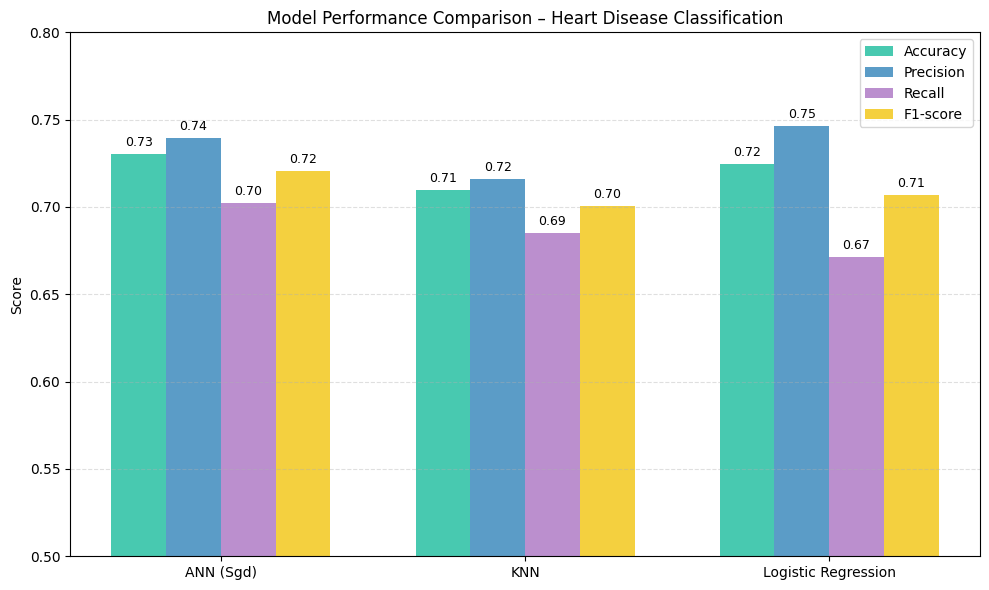

In [90]:
x = np.arange(len(models))
width = 0.18

plt.figure(figsize=(10, 6))

bars1 = plt.bar(x - 1.5*width, accuracy, width, label="Accuracy", color="#48C9B0")
bars2 = plt.bar(x - 0.5*width, precision, width, label="Precision", color="#5B9CC7")
bars3 = plt.bar(x + 0.5*width, recall, width, label="Recall", color="#BB8FCE")
bars4 = plt.bar(x + 1.5*width, f1, width, label="F1-score", color="#F4D03F")

plt.xticks(x, models)
plt.ylabel("Score")
plt.ylim(0.50, 0.80)   
plt.title("Model Performance Comparison – Heart Disease Classification")

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.003,
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

for bars in [bars1, bars2, bars3, bars4]:
    add_labels(bars)

plt.tight_layout()
plt.show()


## Završni zaključak

Ovaj projekat demonstrira uspešnu primenu tehnika mašinskog učenja u predviđanju srčanih oboljenja. Sveukupno posmatrano, izbor optimalnog modela zavisi od konkretnog cilja primene. Ukoliko je prioritet maksimalna detekcija obolelih pacijenata, KNN se izdvaja kao najpogodniji model. Sa druge strane, ako je cilj postizanje stabilnih i uravnoteženih performansi, ANN predstavlja najefikasnije rešenje. Logistička regresija ostaje pouzdan i interpretabilan referentni model.